In [2]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix

import joblib

In [3]:
train = pd.read_csv("D:/MALLICK/iNurture/DataScience/important notes/hack1/Loan_Data/train.csv")

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train = train.dropna()

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [8]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [10]:

train.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [11]:

object_column = train.select_dtypes(exclude = np.number).drop(columns=['Loan_ID']).columns

In [12]:
encode = LabelEncoder()

In [13]:
for i in object_column:
    train[i] = encode.fit_transform(train[i])

C:\Users\msmdm\AppData\Local\Temp/ipykernel_9904/3802558810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i] = encode.fit_transform(train[i])
C:\Users\msmdm\AppData\Local\Temp/ipykernel_9904/3802558810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i] = encode.fit_transform(train[i])
C:\Users\msmdm\AppData\Local\Temp/ipykernel_9904/3802558810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [14]:
train[object_column]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [15]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
columns_consider = 

SyntaxError: invalid syntax (Temp/ipykernel_9904/1881501183.py, line 1)

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(train.drop(columns=['Loan_ID','Loan_Status']), train['Loan_Status'])

RandomForestClassifier()

In [19]:

model.predict(train.drop(columns=['Loan_ID','Loan_Status']))

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [20]:

list(zip(train.drop(columns=['Loan_ID','Loan_Status']).columns,model.feature_importances_)).sort()

In [21]:
pd.Series(list(zip(train.drop(columns=['Loan_ID','Loan_Status']).columns,model.feature_importances_)))

0               (Gender, 0.021292377610467084)
1               (Married, 0.02648939992711331)
2            (Dependents, 0.04494999103152661)
3            (Education, 0.023160822726602595)
4         (Self_Employed, 0.01915583258047318)
5       (ApplicantIncome, 0.21273359919079593)
6     (CoapplicantIncome, 0.11072330074531107)
7            (LoanAmount, 0.19281903801502875)
8      (Loan_Amount_Term, 0.04854864839916746)
9         (Credit_History, 0.2483587545815114)
10       (Property_Area, 0.051768235192002646)
dtype: object

<AxesSubplot:>

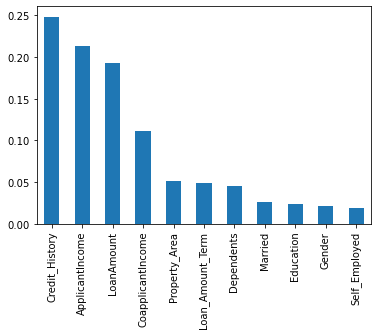

In [22]:
pd.Series(model.feature_importances_,index = train.drop(columns=['Loan_ID','Loan_Status']).columns).sort_values(ascending=False).plot(kind = 'bar')

In [23]:
important_columns = pd.Series(model.feature_importances_, index = train.drop(columns=['Loan_ID','Loan_Status']).columns).sort_values(ascending=False).head(4).index

In [24]:
train_X, test_X, train_y, test_y = train_test_split(train[important_columns],train['Loan_Status'], test_size = 0.3)

In [25]:
train_X.shape,train_y.shape

((336, 4), (336,))

In [26]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [27]:
train_pred = model.predict(train_X)

In [28]:

accuracy_score(train_y, train_pred)

1.0

In [29]:

confusion_matrix(train_y, train_pred)

array([[111,   0],
       [  0, 225]], dtype=int64)

In [30]:

test_pred = model.predict(test_X)

In [31]:

accuracy_score(test_y, test_pred)

0.7847222222222222

In [32]:

confusion_matrix(test_y, test_pred)

array([[23, 14],
       [17, 90]], dtype=int64)

In [33]:
import joblib

In [34]:
joblib.dump(model,"loan_randomforest_model.pkl")

['loan_randomforest_model.pkl']

In [35]:
important_columns

Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome'], dtype='object')

In [36]:

joblib.__version__

'1.1.0'